In [0]:
from google.colab import drive
drive.mount('/content/drive')


import os
print(os.listdir()[:5])

os.chdir('drive/My Drive/')

import pandas as pd
df = pd.read_csv('./Add_data/data/categorical.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
['.config', 'drive', 'sample_data']


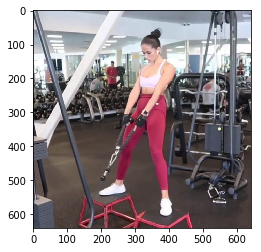

In [0]:
import matplotlib.pyplot as plt

img = plt.imread(df['imageID'][1700])
plt.imshow(img)

In [0]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

pre_img= []
def process_image(images, target_shape):
    """Given an image, process it and return the array."""
    # Load the image.
    for image in images:
      
      h, w = target_shape
      image = load_img(image, target_size=(h, w))

      # Turn it into numpy, normalize and return.
      img_arr = img_to_array(image)
      x = (img_arr / 255.).astype(np.float32)

      pre_img.append(x)

process_image(df['imageID'] , (224,224))
pre_img_np = np.array(pre_img)
np.save('pre_img_np',pre_img_np)
del(pre_img_np)       

In [0]:
#  from keras.applications.vgg19 import preprocess_input
from keras.applications.inception_v3 import  preprocess_input
import numpy as np
from keras.utils import np_utils


X= preprocess_input(np.load('./Add_data/data/pre_img_np.npy'))    # preprocessing the input data

y = df['classID(0->squats/1->press)']
y = np_utils.to_categorical(y.values, num_classes=2)


Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)    # preparing the validation set



del(X)
del(y)

In [0]:
from keras.models import Sequential
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, InputLayer, Dropout,Input , Flatten
from keras.models import Model
from keras.layers import TimeDistributed

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224 , 224 , 3))


W0717 18:24:30.630786 140083925530496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 18:24:30.700596 140083925530496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 18:24:30.717207 140083925530496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 18:24:30.771577 140083925530496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0717 18:24:30.773218 1400839255

87916544/87910968 [==============================] - 3s 0us/step


In [0]:
"""


   USING KERAS SEQUENTIAL API-------------------
   
   
   
"""

In [0]:
# X_train = base_model.predict(X_train)
# X_valid = base_model.predict(X_valid)
# print(X_train.shape, X_valid.shape)

# X_train = X_train.reshape(5058, 5*5*2048)      # converting to 1-D
# X_valid = X_valid.reshape(2169, 5*5*2048)



test_model = Sequential()
test_model.add(TimeDistributed(Dense(256, activation='relu', input_dim=(5*5*2048) ) ))
test_model.add(Dropout(0.5))
test_model.add(Dense(2, activation= 'softmax'))


# print(model.summary())

test_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
test_model.fit(X_train, y_train, epochs=100 ,batch_size = 32,validation_data= (X_valid , y_valid) )
test_model.evaluate(X_valid, y_valid)


In [0]:
""
   USING KERAS MODEL API (DIRECTED ACYCLIC GRAPHS)
   
"""

In [0]:
from keras.layers import TimeDistributed
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(5*5*2048,))

x = Dense(256, activation='relu')(inputs)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)


model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100 ,batch_size = 64 )



# input_sequences = Input(shape=(20, 5*5*2048))
# processed_sequences = TimeDistributed(model)(input_sequences)
# x = Dense(256, activation='relu')(processed_sequences)
# x = Dropout(0.5)(x)
# predictions = Dense(2, activation='softmax')(x)

# model = Model(inputs=input_sequences, outputs=predictions)
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=100 ,batch_size = 64 )


In [0]:
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D, MaxPooling2D)
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers import ConvLSTM2D,TimeDistributed
from keras.layers.wrappers import TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras import regularizers



def lrcn():
    """Build a CNN into RNN.
    Starting version from:
        https://github.com/udacity/self-driving-car/blob/master/
            steering-models/community-models/chauffeur/models.py
    Heavily influenced by VGG-16:
        https://arxiv.org/abs/1409.1556
    Also known as an LRCN:
        https://arxiv.org/pdf/1411.4389.pdf
    """
    def add_default_block(model, kernel_filters, init, reg_lambda):

        # conv
        model.add(TimeDistributed(Conv2D(kernel_filters, (3, 3), padding='same',
                                         kernel_initializer=init, kernel_regularizer=regularizers.l2(0.01))))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(Activation('relu')))
        # conv
        model.add(TimeDistributed(Conv2D(kernel_filters, (3, 3), padding='same',
                                         kernel_initializer=init, kernel_regularizer=regularizers.l2(0.01))))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(Activation('relu')))
        # max pooldata_format='channels_first'
        model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

        return model

    initialiser = 'glorot_uniform'
    reg_lambda  = 0.01

    model = Sequential()

    # first (non-default) block
    model.add(TimeDistributed(Conv2D(32, (7, 7), strides=(2, 2),data_format='channels_first',padding = 'same',
                                     kernel_initializer=initialiser, kernel_regularizer = regularizers.l2(0.01)),
                              input_shape=(5*5*2048))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Activation('relu')))
    model.add(TimeDistributed(Conv2D(32, (3,3), kernel_initializer=initialiser, kernel_regularizer=regularizers.l2(0.01))))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Activation('relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

    # 2nd-5th (default) blocks
    model = add_default_block(model, 64,  init=initialiser, reg_lambda=reg_lambda)
    model = add_default_block(model, 128, init=initialiser, reg_lambda=reg_lambda)
    model = add_default_block(model, 256, init=initialiser, reg_lambda=reg_lambda)
    model = add_default_block(model, 512, init=initialiser, reg_lambda=reg_lambda)

    # LSTM output head
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(256, return_sequences=False, dropout=0.5))
    model.add(Dense(2, activation='softmax'))

    return model


lrcn_model =  lrcn()

print(model.summary())
model.compile(loss = 'category_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
#Reshaping the X_train................

X_train = X_train[:, np.newaxis]
X_valid = X_valid[:, np.newaxis]

In [0]:
# iii. Training the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid) ,batch_size = 256 )

Train on 5058 samples, validate on 2169 samples
Epoch 1/50


In [0]:
|model.evaluate(X_valid, y_valid)

In [0]:
model.save('lstm_weights.h5')